In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

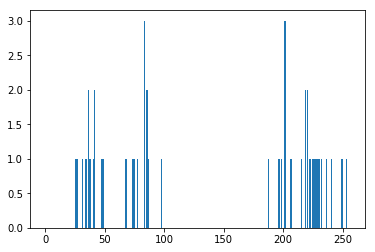

In [2]:
x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z, 256, [0, 256])
plt.show()

In [3]:
# Define criteria = (type, max_iter = 10, epsilon = 1.0)
criteria = (cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS
# Apply KMeans
compactness, labels, centers = cv.kmeans(z, 2, None, criteria, 10, flags)

In [4]:
A =z[labels==0]
B =z[labels==1]

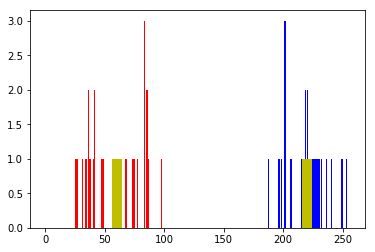

In [5]:
# Now plot 'A' in red , 'B' in blue, 'center' is yellow
plt.hist(A,256,[0,256],color='r')
plt.hist(B,256,[0,256],color='b')
plt.hist(centers,32,[0,256],color='y')
plt.show()

In [7]:
# Multi-Features
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
Z = np.float32(Z)

In [8]:
# define critieria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER,10,1.0)
ret, label, center = cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

In [9]:
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

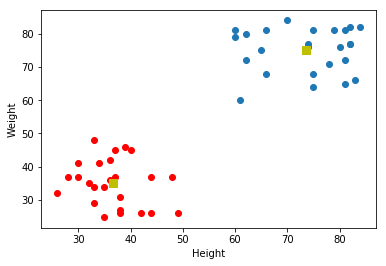

In [10]:
# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c='r')
plt.scatter(center[:,0],center[:,1],s=80,c='y',marker='s')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [11]:
# Color Quantization
import numpy as np
import cv2 as cv
img = cv.imread('home.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K), and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K=8
ret, label, center = cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv.imshow('res2',res2)
cv.waitKey(0)
cv.destroyAllWindows()